## Embedding in $d=2$ (two patterns)

cycling patterns

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt, matplotlib.animation as animation
import numpy as np
from neurodyn import *
from utils import *

In [23]:
F, G = make_F_G_valentin(p=2, N=100_000, phi=sigmoid)
phi=sigmoid
I_ext=lambda t: 0

In [24]:
rnn = LowRankRNN(F, G, phi, I_ext)

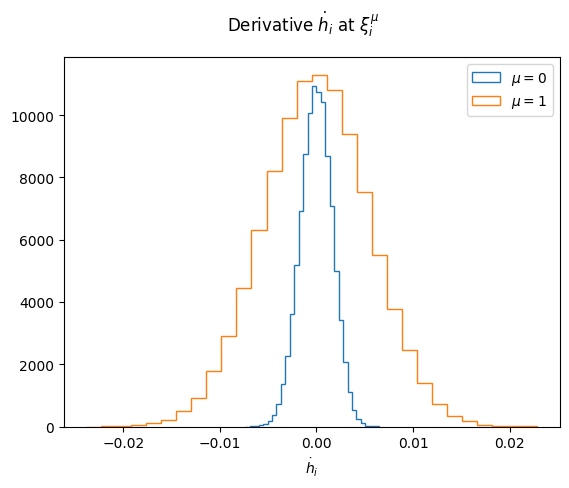

In [25]:
plot_dh_hist(rnn);

In [5]:
with Timer(f'{rnn.N=} simulation'):
	res = rnn.simulate_h(rnn.F[:, 0], (0, 40), dt_max=0.1)

[rnn.N=50000 simulation] 51296.50 ms


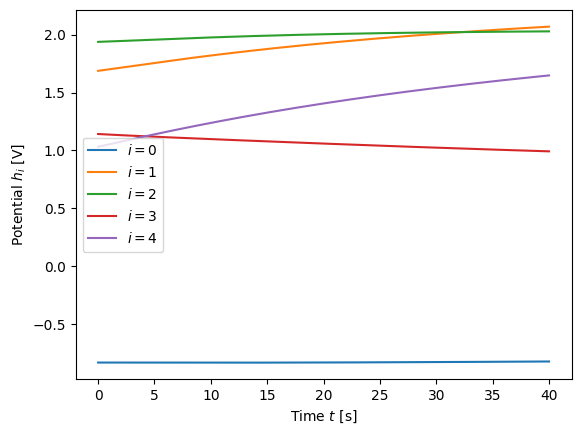

In [6]:
fig, ax = plot_neuron_trajectory(res)

In [7]:
with Timer(f'{rnn.N=} simulation'):
	res = rnn.simulate_h(rnn.F[:, 1], (0, 40), dt_max=0.1)

[rnn.N=50000 simulation] 44990.80 ms


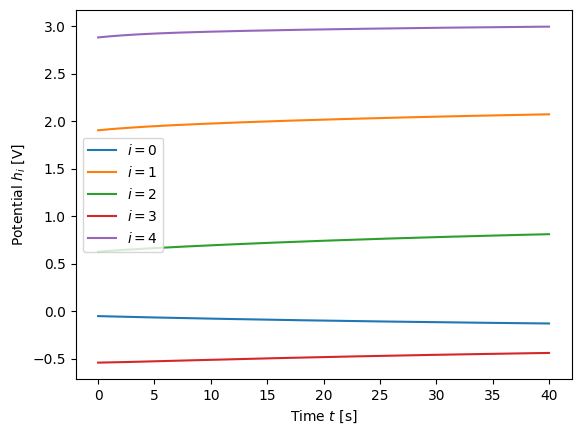

In [8]:
fig, ax = plot_neuron_trajectory(res)